# 1. Prepare for the training

In [28]:
#import needed libraries 
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle 
from fastkaggle import *
from fastai.vision.all import * 

In [29]:
comp = 'muffin-vs-chihuahua-image-classification'
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

In [30]:
# 디스플레이를 사용해서 경로가 맞나 확인
display(path)

Path('../input/muffin-vs-chihuahua-image-classification')

In [31]:
# Check what is inside the path -> space 없어서 에러났었음 
!ls {path}

test  train


In [32]:
# Set our own path and seperate it to train model
train_path = path/'train'
validation_path = path/'test'

In [33]:
# Get all the files to use it in training 
files = get_image_files(train_path) # use all the files in the folder to train 

In [38]:
# Print and check the image
image = PILImage.create(files[0])
print(image)

PILImage mode=RGB size=1200x1800


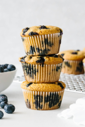

In [48]:
# Parameter of to_thumb(h,w)
image.to_thumb(127)

In [52]:
# ImageDataLoader를 사용할 때 폴더를 이용해서 데이터에 접근
dls = ImageDataLoaders.from_folder(
    train_path,
    valid_pct = 0.2,
    seed = 42,
    item_tfms= Resize(192, method = 'squish')
)

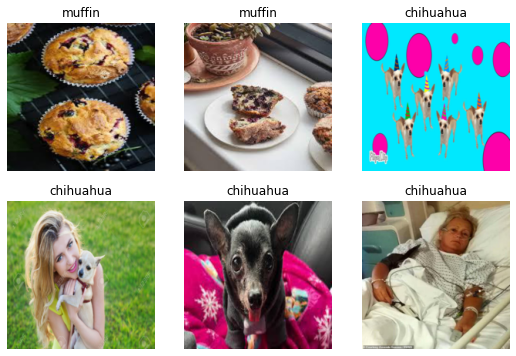

In [55]:
# 몇 개 보여줄건지 parameter 설정 
dls.show_batch(max_n = 6)

# 2. Training

In [62]:
# Train the pictures 
learn = vision_learner(dls,resnet18,metrics = error_rate) #Takes 3 things -> 데이터로더, 모델명(pretrained model),에러rate

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [65]:
# finetuning 몇 번할지 정해줌 -> parameter 값이 epoch
learn.fine_tune(2) # 3번 

epoch,train_loss,valid_loss,error_rate,time
0,0.010318,0.019579,0.004228,02:15


epoch,train_loss,valid_loss,error_rate,time
0,0.016636,0.029835,0.008457,02:16
1,0.016195,0.016084,0.007400,02:16


In [68]:
# Get the validation files
validation_files = get_image_files(validation_path)

In [85]:
# Print and check the image
val_image = PILImage.create(validation_files[50])

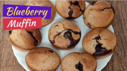

In [86]:
# Prediction from validation image
is_chihuahua, _, probs = learn.predict(val_image)
val_image.to_thumb(127)

In [87]:
print(f'This is a: {is_chihuahua}.')

This is a: muffin.


질문: train에서 0.2로 split 한 값은 사용되지 않았나? -> 경로 설정 자체를 test폴더로 했기 때문에 실제 test dataset을 사용한 것이 맞음.